# Proyecto análisis y gestión de recursos aeroportuarios del Aeroparque Jorge Newbery

### Big Data Bang: explosionando las rutas aéreas para predecir un caos en alto vuelo.
---


Grupos de trabajo:
* Joaquin Barrionuevo
* Sebastián Coca
* Sabrina Gonzalez del Campo


* Francisco Brogiolo
* Miguel Cittadini
* Marcelo Bianchi
* Martín Brogiolo

#1 Entender el dominio

##a) Abstract

Decidimos elegir este proyecto porque presenta diferentes desafíos como el cruzamiento con otras bases de datos (clima, aeropuertos, etc.) y la posibilidad de aplicar la ciencia de datos al área de logística, afrontando un problema real y que podría ser de utilidad en la práctica. Por otra parte, nos interesa también conocer más de cerca el aeropuerto Jorge Newbery, uno de los que más flujo de pasajeros presenta en toda la Argentina, y poder presentar propuestas de mejora acerca de la saturación del aeropuerto basándonos en datos. Entender la capacidad del aeropuerto y la gestión de sus recursos será clave para afrontar el proyecto.
El período comprendido en nuestra base de datos es desde enero 2019 hasta septiembre 2022 y contiene información a cerca de los arribos al aeropuerto, con datos de fecha, procedencia, aerolínea. Es relevante que contamos con un año completo en la situación pre-pandemia para entender el flujo normal sin restricciones aeroportuarias. El problema se afrontará utilizando Python y una serie de librerías comunes en la Ciencia de Datos, tales como numpy, pandas, sklearn, matplotlib, seaborn, missingo, etc.
El objetivo de este proyecto es entender el volumen de arribos: si hay alguna tendencia de horarios, día, mes o época del año donde se presenten picos, el porcentaje de vuelos con retrasos y entender si provienen mayoritariamente de una aerolínea o aeropuerto en particular (o si tienen correlación con alguna otra variable), y finalmente aplicar machine learning a la base de datos limpia para poder predecir algún pico y proponer de ser posible alguna acción que logre evitar la saturación del aeropuerto.

##b) Contexto comercial/empresarial

Dada la excelente ubicación geográfica (a minutos de Capital Federal), el **Aeropuerto Jorge Newbery** es estretégico para la explotación de empresas aéreas tanto nacionales, como internacionales. Luego de la pandemia del Covid 2020 se decretó que el mismo volvería a ser un aeropuerto internacional (destinos del Mercosur y países de Sudamérica). Es por esto, que se han incrementado exponencialmente sus operaciones, pero su infraestructura para soportar este incremento no ha acompañado. Luego de la epoca de confinamiento, se reconstruyó la única pista que este aeródormo posee. Esta obra no es suficiente, ya que la terminal de pasajeros ha permanecido prácticamente sin grandes incrementos de su capacidad.

Se realizará el estudio de los datos provistos por el explotador aéreo existente a fin de prever los picos de capacidad de todos los subsistemas que integran al aeropuerto en sí, y así evitar saturaciones de los mismos, permitiendo una mejor planificación de los recursos aeroportuarios.




##c) Problema comercial

Se procederá a formatear los datos existentes y proporcionar visualizaciones que respondan las siguientes preguntas:

* Cantidad de arribos por mes
* Cantidad de Pasajeros por mes
* Distribución de arribos por día y frecuencia
* Distribucion de vuelos provenientes de distintos lugares (eg. Brasil)
* ¿Es posible predecir demoras por ruta?
* Durante un año, ¿qué cabecera es la que más se utilizó? ¿En qué posición?
* ¿Hay zonas geográficas que tienden a tener más demoras que otras?
* ¿Cuáles son los horarios picos de pasajeros en la terminal?
* Posibles causas de las demoras
* Se relacionan las demoras al mal clima?




##d) Contexto analítico

Para efectuar el análisis se proporciona un archivo CSV que contiene datos de vuelos entre los años 2019 y septiembre del 2022 inclusive. Este dataset cuenta con informacion de cantidad de pasajeros, horas de arribo y de programación, etc. El problema a resolver es poder predecir las demoras en los distintos vuelos para así poder prever de la mejor manera los recursos aeroportuarios para evitar la saturación de los mismos.


Detalle de las caracteristicas del Dataset:

1. Tipos de datos que posee la tabla (en funcion de las variables)
2. Dimensiones del dataset -> cantidad de observaciones (filas) y atributos (columnas)
3. Posibles unidades de análisis

###  Consideraciones generales del contexto del negocio

Consideramos que la base de datos es útil para entender el negocio, pero no sufuciente. Para ello se recurrirá a otras bases de datos complementarias (por ejemplo con bases de datos de aeropuertos nacionales e internacionales -útiles para complementar con el país y la ciudad de proveniencia de cada vuelo- y bases de datos del clima entre otras).

# Instalación y actualización de librerías a utilizar en el desarrollo del proyecto

In [ ]:
!pip --version #verificación de versión y actualización. No es necesario, está en su última versión (32.1.2 @ 2023/06/13)
#!pip install --upgrade pip

pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [ ]:
#@title Instalación de librerías externas
!pip install -q pingouin
!pip install --upgrade Pillow           # para que funcione ydata-profiling
!pip install -q -U ydata-profiling

# Recordar reiniciar el runtime para que cargue bien las librerías

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#@title Actualización de ydata-profiling a la última versión desde GitHub
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/ydataai/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=353033 sha256=782744fac517955a0c79ea06b69cb78e87c965befef18a2a68b68db70a7f89ce
  Stored in directory: /tmp/pip-ephem-wheel-cache-db4hlnk9/wheels/f5/4e/04/09011c49d76834ce963a4fe57acc90b11fa8bb282bb9781d97
Successfully built ydata-profiling
  Attempting uninstall: ydata-profiling
    Found existing installation: ydata-profiling 4.3.1
    Uninstalling ydata-profiling-4.3.1:
      Successfully uninstalled ydata-profiling-4.3.1


In [ ]:
#@title Carga de librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn

import missingno as msno
#import pingouin as pg
import plotly.express as px
#from ydata_profiling import ProfileReport

from statsmodels.stats.proportion import proportions_ztest
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, Normalizer, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier  #arbol de decision
from sklearn import tree #arbol de decision
from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_score, LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# guardado de la DB en el drive
path = '/content/drive/Shared drives/M08-BigDataBang/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Carga de parámetros
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#2 Preguntas que nos podemos hacer como data scientist

##a) Importar y analizar el dataset para ver con qué datos contamos, en cantidad y calidad: indagar no sólo el tipo de cada dato (categóricos, numéricos) si no su naturaleza (si son demográficos, económicos, temporales, etc).

In [ ]:
#@title Carga del dataset
url = 'https://raw.githubusercontent.com/NoeliaFerrero/Proyecto_MentoriaFAMAF_2023/main/DataSet%20Aeropuerto%20Jorge%20Newery.csv'
df = pd.read_csv(url, sep=";", encoding='latin-1')
df

#dfla = pd.read_csv('https://raw.githubusercontent.com/Fran-Brogiolo/DataScienceDiploma/master/Mentor%C3%ADa%20Big%20Data%20Bang/Aeropuertos.csv')

<ipython-input-128-cf4e4690cb5f>:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, sep=";", encoding='latin-1')


,Aero,#Vuelo,CShare,Origen,Via,STA,SUG,ETA,ATA,Tipo,Asignar,Pos,Ter,Sec,Rmk,Cin,L&F,Pax,Vip,Mat,Acft,Obs.,Aero.1,#Rot,Cabecera,año,mes,hora
0,DN,6049,NaN,IGR,NaN,1/1/2019 01:50,NaN,NaN,1/1/2019 01:22,1 C P,NaN,31,A,2,ATE,8,NaN,100.00,NaN,LVHQH,738,NaN,DN,6062,31.00,2019,1,1
1,4M,7623,NaN,COR,NaN,1/1/2019 06:17,NaN,05:50,1/1/2019 06:02,1 C P,NaN,9,A,2,ATE,6,NaN,36.00,NaN,LVBFO,320,NaN,4M,7502,31.00,2019,1,6
2,4M,7653,NaN,MDZ,NaN,1/1/2019 07:37,NaN,07:30,1/1/2019 07:30,1 C P,NaN,10,A,2,ATE,8,NaN,153.00,NaN,LVGLP,320,NaN,4M,7550,13.00,2019,1,7
3,AR,1671,NaN,NQN,NaN,1/1/2019 07:40,NaN,07:29,1/1/2019 07:26,1 C P,NaN,7,A,2,ATE,1,NaN,28.00,NaN,LVFUA,738W,NaN,AR,1672,13.00,2019,1,7
4,AR,1611,NaN,MDQ,NaN,1/1/2019 07:55,NaN,07:45,1/1/2019 07:43,1 C P,NaN,26,A,2,ATE,2,NaN,146.00,NaN,LVGVA,738W,NaN,AR,1496,13.00,2019,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127924,WJ,3481,NaN,SLA,NaN,30/9/2022 22:08,NaN,22:03,30/9/2022 22:05,1 C P,NaN,17,A,N,ATE,9,NaN,187.00,NaN,LVKDP,320,NaN,WJ,3266,13.00,2022,9,22
127925,JA,1003,NaN,SCL,NaN,30/9/2022 22:15,NaN,NaN,30/9/2022 22:32,1 I P,NaN,68,A,I,ATE,3I,NaN,150.00,NaN,CCAWQ,320N,NaN,JA,1004,13.00,2022,9,22
127926,WJ,3269,NaN,COR,NaN,30/9/2022 22:21,NaN,22:01,30/9/2022 22:02,1 C P,NaN,16,A,N,ATE,7,NaN,163.00,NaN,LVHVT,320,NaN,WJ,3461,13.00,2022,9,22
127927,FO,5225,NaN,TUC,NaN,30/9/2022 23:25,NaN,23:20,30/9/2022 23:15,1 C P,NaN,66,A,N,ATE,8,NaN,178.00,NaN,LVKAY,738W,NaN,FO,5042,13.00,2022,9,23


## Tipos de datos

**Columnas**:
* Nombre_Aerolinea: Aerolinea --> categórico
* Codigo_Vuelo --> categórico, código único por vuelo
* Ruta_Vuelo: Ruta del vuelo --> categórica
* Horario_Prog_Arribo: Horario programado de arribo. Es el horario de arribo al momento de comprar el pasaje. --> categórica temporal.
* Horario_Estimado_Arribo: Estimated Time Arrival.Es el horario de arribo actualizado al momento que el vuelo parte. --> categórica temporal.
* Horario_Actual_Arribo: Actual Time Arrival. Es el horario real de arribo. --> categórica temporal.
* Tipo_Vuelo: Codificación del tipo de vuelo --> categórica
* Posicion_Arribo: Posición asignada al arribo --> categórica
* Terminal_Arribo: Terminal en que opera el arribo --> categórica
* Sector: sector asociado a la terminal --> categórica
* Estado_vuelo: Estado del vuelo --> categórica
* Cinta_equipajes: Cinta asignada para retirar equipajes --> categórica
* Cant_Pasajeros: Cantidad de pasajeros
* Matricula_Aeronave: MAtricula de la aeronave --> categórica
* Tipo_aeronave: Tipo de aeronave --> categórica
* Nombre_Aerolinea_Partida: empresa aerea asociada a la partida --> categórica
* Vuelo_Partida: Vuelo asociado a la partida --> categórica
* Cabecera_Arribo: Cabecera de pista donde operó el arribo --> categórica
* Año_Vuelo: año de operación del vuelo --> categórica temporal
* Mes_Vuelo: mes de operación del vuelo --> categórica

Columnas eliminadas posteriormente por tener muchos o todos los datos vacíos: Via, Obs., L&F, Vip, SUG, CShare, Asignar

In [ ]:
#@title Generación del reporte a través de ydata-profiling para un primer análisis
profile = ProfileReport(df, title="Profiling Report")
#profile.to_file("ReporteFull.html")
#from wordcloud import WordCloud
#from pillow import ImageFont
#font = ImageFont.truetype('Roboto-Bold.ttf', size=10)
#ImageFont.truetype('Roboto-Bold.ttf', size=10)

NameError: ignored

In [ ]:
# Se exporta al drive el reporte
profile.to_file(path+"ReporteFull.html")

In [ ]:
# Se genera el reporte dentro de la notebook
#profile.to_widgets()
profile.to_notebook_iframe()

Del análisis del reporte podemos descartar las siguientes columnas por no contener datos o estar prácticamente vacías:
* CShare (sin datos)
* Via
* SUG (sin datos)
* Asignar (sin datos)
* L&F
* Vip
* Obs




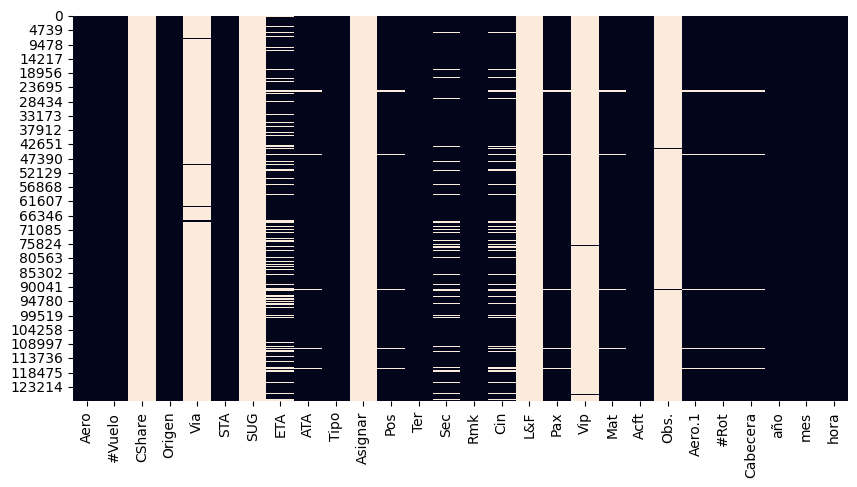

<Axes: >

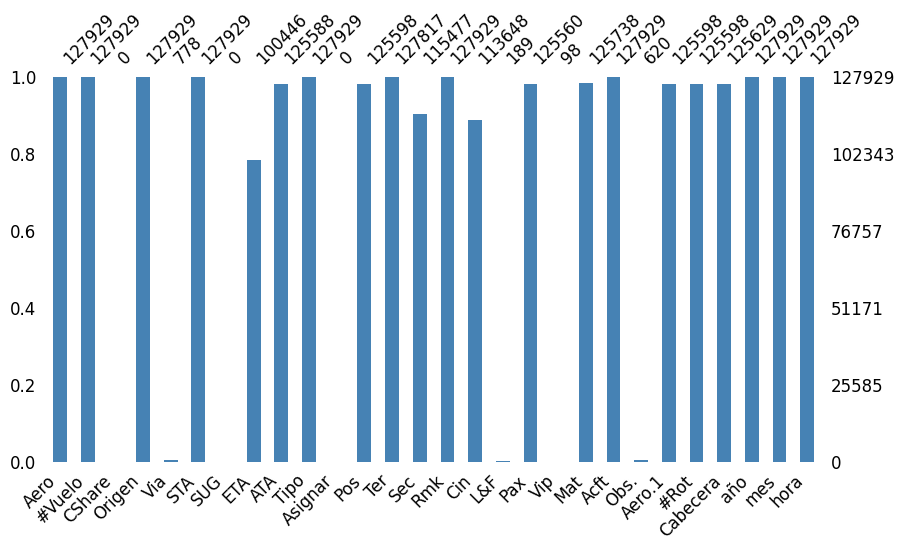

In [ ]:
#gráfico de missing values para todo el dataset
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)
plt.show()
msno.bar(df,figsize=(10, 5), fontsize=12, color='steelblue')

##c) Consideramos que el objetivo podria ser cumplido con los datos existentes?

Consideramos que sería útil agregar información geográfica sobre los aeropuertos, así como información del tipo de aeronave: su uso más común y su capacidad máxima de pasajeros. Para ello hemos preparado estas bases de datos:

In [ ]:
Link_Aeropuertos = 'https://raw.githubusercontent.com/Fran-Brogiolo/DataScienceDiploma/master/Mentor%C3%ADa%20Big%20Data%20Bang/Aeropuertos.csv'
Aeropuertos_df = pd.read_csv(Link_Aeropuertos)# , sep=',')
Aeropuertos_df[:5]

,Código_aeropuerto,Nombre_aeropuerto,Pais,Ciudad
0,ABV,Nnamdi Azikiwe International Airport,Nigeria,Abuja
1,AEP,Aeroparque Jorge Newbery,Argentina,Buenos Aires
2,AFA,San Rafael Airport,Argentina,San Rafael
3,ANF,Cerro Moreno International Airport,Chile,Antofagasta
4,ANU,V.C. Bird International Airport,Antigua,St. John's


In [ ]:
Link_Aeronaves = 'https://raw.githubusercontent.com/Fran-Brogiolo/DataScienceDiploma/master/Mentor%C3%ADa%20Big%20Data%20Bang/Aeronaves.csv'
Aeronaves_df = pd.read_csv(Link_Aeronaves , encoding='latin-1')
Aeronaves_df[:5]

,Tipo de Aeronave,Capacidad máxima de pasajeros,Uso más común
0,738,189,Transporte de pasajeros
1,320,180,Transporte de pasajeros
2,738W,189,Transporte de pasajeros
3,E190,114,Transporte de pasajeros
4,737W,189,Transporte de pasajeros


##d) ¿Tenemos forma de identificar de manera única cada registro? ¿Cuántas observaciones?
Si, mediante el codigo de vuelo.

In [ ]:
print("Observaciones: ",df.shape[0])

Observaciones:  127929


##e)  ¿Qué periodos de fechas tenemos en el dataset?
Desde enero 2019 hasta septiembre 2022

In [ ]:
print("Mínimo ", min(df['STA']))
print("Máximo", max(df['STA']))

Mínimo  1/1/2019 01:50
Máximo 9/9/2022 23:55


##f) Pensando en el histórico de datos, ¿tenemos datos "suficientes" para pensar en realizar un modelo predictivo?
De datos "replicables" tenemos solo un año y medio aproximadamente, que sería el 2019 y 2022, ya que el 2020 y 2021 están fuertemente afectados por las restricciones por la pandemia. Consideramos igualmente que es información suficiente para crear modelo predictivo aunque no tan robusto. Tambien si nuestro objetivo es predecir indicadores de retrasos en los vuelos tenemos 2 columnas de mucha utilidad, una siendo STA la cual nos indica el horario en el cual el avion deberia arribar y ATA que nos indica el horario en el que el avion efectivamente arribo.

##g) ¿Tenemos la columna target (necesaria en problemas de aprendizaje supervisado)?
Podemos crear 3 columnas target como resta de las columnas STA, ETA y ATA tomando de a 2 columnas a la vez, generando columnas de "Demora en minutos"

#3 Limpieza y Feature Engineering


##a) Revisión, eliminación o imputación de datos Nulos.

In [ ]:
def porcentaje_nulos(df):
  porc_null=(df.isnull().sum()/df.shape[0])*100 #porcentaje de nulos por columna
  porc_null=porc_null.sort_values(ascending=False)
  print(porc_null[porc_null>0])
  return

In [ ]:
porcentaje_nulos(df)

Asignar    100.00
CShare     100.00
SUG        100.00
Vip         99.92
L&F         99.85
Obs.        99.52
Via         99.39
ETA         21.48
Cin         11.16
Sec          9.73
Pax          1.85
ATA          1.83
#Rot         1.82
Aero.1       1.82
Pos          1.82
Cabecera     1.80
Mat          1.71
Ter          0.09
dtype: float64


In [ ]:
#@title Eliminación de columnas vacías y con pocos datos
display(df.shape)
df.dropna(axis=1, how='all', inplace=True)
display(df.shape)
print('Se eliminaron 3 columnas vacías')

(127929, 28)

(127929, 25)

Se eliminaron 3 columnas vacías


Eliminamos las 4 columnas con más del 99% de datos nulos

In [ ]:
#columnas a eliminar:
columns_to_drop = ['Via','L&F','Vip','Obs.']

#count de los valores no na de estas columnas:

print('CANTIDAD DE VALORES NO NULOS DE LAS COLUMNAS A ELIMINAR:')
for col in columns_to_drop:
    print(col, df[col].count())
print('')
print('Filas del df: {df.shape[0]}')

#eliminar las columnas
df.drop(columns_to_drop, axis=1, inplace=True)
print('Se eliminaron 4 columnas con pocos datos:', columns_to_drop)

df.shape

CANTIDAD DE VALORES NO NULOS DE LAS COLUMNAS A ELIMINAR:
Via 778
L&F 189
Vip 98
Obs. 620

Filas del df: {df.shape[0]}
Se eliminaron 4 columnas con pocos datos: ['Via', 'L&F', 'Vip', 'Obs.']


(127929, 21)

Renombramos las columnas para que los nombres sean más significativos:

In [ ]:
df.rename(columns={'Aero': 'Nombre_Aerolinea', # '4M' '5U' 'A0' 'AJ' 'AR' 'AU' 'DN' 'FAA' 'FO' 'FQ' 'G3' 'H2' 'H8' 'JA', 'LA' 'LP' 'OY' 'PRV' 'USF' 'VH' 'WJ' 'Z7' 'ZP'
           '#Vuelo': 'Codigo_Vuelo',
           'Origen': 'Ruta_Vuelo',
           'STA': 'Horario_Prog_Arribo',
           'ETA': 'Horario_Estimado_Arribo',
           'ATA': 'Horario_Actual_Arribo',
           'Tipo': 'Tipo_Vuelo',                     # que valores que puede contener esta variable?
           'Pos': 'Posicion_Arribo',
           'Ter': 'Terminal_Arribo',
           'Sec': 'Sector',
           'Rmk': 'Estado_Vuelo',                    # Ate: aterrizado (tierra), Can: Cancelado, Alt: Altura (aire)
           'Cin': 'Cinta_Equipajes',
           'Pax': 'Cant_Pasajeros',
           'Mat': 'Matricula_Aeronave',
           'Acft': 'Tipo_Aeronave',                  # que valores que puede contener esta variable?
           'Aero.1': 'Nombre_Aerolinea_Partida',     # 4M' '5U' 'A0' 'AJ' 'AR' 'AU' 'DN' 'FAA' 'FO' 'FQ' 'G3' 'H2' 'H8' 'JA', 'LA' 'LP' 'OY' 'PRV' 'USF' 'VH' 'WJ' 'Z7' 'ZP', etc...
           '#Rot': 'Vuelo_Partida',
           'Cabecera': 'Cabecera_Arribo',
           'año': 'Año_Vuelo',
           'mes': 'Mes_Vuelo',
           'hora': 'Hora_Vuelo'},
           inplace = True)

In [ ]:
porcentaje_nulos(df)

Horario_Estimado_Arribo    21.48
Cinta_Equipajes            11.16
Sector                      9.73
Cant_Pasajeros              1.85
Horario_Actual_Arribo       1.83
Nombre_Aerolinea_Partida    1.82
Posicion_Arribo             1.82
Vuelo_Partida               1.82
Cabecera_Arribo             1.80
Matricula_Aeronave          1.71
Terminal_Arribo             0.09
dtype: float64


Para la columna 'Horario actual de arribo' proponemos directamente eliminar esas filas, ya que el horario de arribo es parte de la columna target, y no son muchos datos (menos del 2%) <font color='green'> --> Lo saco, también porque coincide con faltantes en otras columnas. Lo mismo aplica si faltaran muchos datos (20% por ejemplo). Se eliminan.

In [ ]:
df = df.dropna(subset=['Horario_Actual_Arribo'])

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
porcentaje_nulos(df)

Horario_Estimado_Arribo    20.019
Cinta_Equipajes             9.616
Sector                      9.441
Terminal_Arribo             0.083
Cant_Pasajeros              0.047
Cabecera_Arribo             0.005
Vuelo_Partida               0.004
Nombre_Aerolinea_Partida    0.004
Posicion_Arribo             0.003
Matricula_Aeronave          0.003
dtype: float64


Horario_Estimado_Arribo la vamos a imputar con la columna Horario_Actual_Arribo, ya que es el dato más certero que tenemos. <font color= 'red'> Preguntar cómo utilizamos esta variable siendo que imputamos tantos datos (alguna precaución en particular?) <font color= 'green'>--> Probar variantes, probar algoritmo que imputa con ML. Al momento del modelo ver como performa con uno y como con otro método. Objetivo: minimizar el error.

In [ ]:
datos_nulos = df['Horario_Estimado_Arribo'].isnull()

# Imputa los datos nulos con los valores correspondientes de la columna de origen
df.loc[datos_nulos, 'Horario_Estimado_Arribo'] = df.loc[datos_nulos, 'Horario_Actual_Arribo']

# Verifica que los datos nulos se hayan imputado correctamente
print(df['Horario_Estimado_Arribo'].isnull().sum())

0


In [ ]:
#Definimos función para ayudarnos a visualizar datos
def frecuencia_columna(df_usado, columna_target):

    # Calcula la cantidad de datos con cada valor en la columna especificada
    cantidad_por_valor = df_usado[columna_target].value_counts().reset_index()

    # Renombra las columnas en el DataFrame resultante
    cantidad_por_valor.columns = [columna_target, 'cantidad']

    cantidad_por_valor['porcentaje'] = cantidad_por_valor['cantidad'] / len(df_usado) * 100

    # Calcula el total
    total = cantidad_por_valor['cantidad'].sum()

    # Agrega una fila adicional para el total
    fila_total = pd.DataFrame({columna_target: 'Total', 'cantidad': total, 'porcentaje': total*100/len(df_usado)}, index=[0])
    cantidad_por_valor = pd.concat([cantidad_por_valor, fila_total], ignore_index=True)

    # Muestra la lista con la cantidad de datos por valor y su porcentaje
    print(cantidad_por_valor)
    return

In [ ]:
porcentaje_nulos(df)

Cinta_Equipajes            9.616
Sector                     9.441
Terminal_Arribo            0.083
Cant_Pasajeros             0.047
Cabecera_Arribo            0.005
Vuelo_Partida              0.004
Nombre_Aerolinea_Partida   0.004
Matricula_Aeronave         0.003
Posicion_Arribo            0.003
dtype: float64


In [ ]:
frecuencia_columna(df, 'Cinta_Equipajes')

   Cinta_Equipajes  cantidad  porcentaje
0                2     17533      13.961
1                3     16169      12.875
2                4     15747      12.539
3                5     15532      12.367
4                6     10519       8.376
5                8      8624       6.867
6                7      7885       6.278
7                9      6009       4.785
8               2I      5126       4.082
9               3I      4242       3.378
10               1      3260       2.596
11              1I      2809       2.237
12              1-        56       0.045
13           Total    113511      90.384


Propuesta: crear nuevo valor "Desconocido" para imputar el caso 10% faltante, ya que tiene una distribución uniforme y faltan muchos datos.
Al 1- decidimos asignarlo a 1, consideramos que es un error de tipeo dado que hay muy pocos datos. <font color='green'> --> Propuesta: agrupar el 1 con 1I, 2 con 2I, etc. para simplificar la cant. de opciones. Faltantes: probar, no hay una forma mejor que otra.

In [ ]:
df['Cinta_Equipajes'].fillna('0', inplace=True)
df['Cinta_Equipajes'] = df['Cinta_Equipajes'].str.replace('1-', '1')
#AGRUPAR

<ipython-input-147-0cda93759a7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cinta_Equipajes'].fillna('0', inplace=True)
<ipython-input-147-0cda93759a7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cinta_Equipajes'] = df['Cinta_Equipajes'].str.replace('1-', '1')


In [ ]:
vuelos_cancelados = df[df['Estado_Vuelo'] == 'CAN']
print(f'total vuelos cancelados: {vuelos_cancelados.shape[0]}')
vuelos_cancelados.Cabecera_Arribo.value_counts()

total vuelos cancelados: 1


13.000    1
Name: Cabecera_Arribo, dtype: int64

In [ ]:
na_cabecera = df[df['Cabecera_Arribo'].isna()]
frecuencia_columna(na_cabecera, 'Estado_Vuelo')

  Estado_Vuelo  cantidad  porcentaje
0          ALT         4      66.667
1          ATE         2      33.333
2        Total         6     100.000


**En el caso de los nulos en cabecera, se trata en su gran mayoría de vuelos CANCELADOS (no habrían aterrizado) por lo que no sería correcto asignarles una cabecera. ¿Eliminar?**

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
porcentaje_nulos(df)
frecuencia_columna(df, 'Sector')

Sector                     9.441
Terminal_Arribo            0.083
Cant_Pasajeros             0.047
Cabecera_Arribo            0.005
Vuelo_Partida              0.004
Nombre_Aerolinea_Partida   0.004
Posicion_Arribo            0.003
Matricula_Aeronave         0.003
dtype: float64
  Sector  cantidad  porcentaje
0      N     69010      54.950
1      2     32433      25.825
2      I     12270       9.770
3      A        16       0.013
4      B         2       0.002
5  Total    113731      90.559


Debemos imputar estos datos faltantes, decidir qué método utilizar.
Propuesta: imputar por esa distribución aleatoriamente proporcional a su %. <font color='red'> Consultar si está bien. <font color='green'> --> OK

In [ ]:
sector_proportions = df['Sector'].value_counts(normalize=True)
missing_count = df['Sector'].isna().sum()
imputed_values = np.random.choice(sector_proportions.index, size=missing_count, p=sector_proportions.values)
df.loc[df['Sector'].isna(), 'Sector'] = imputed_values
porcentaje_nulos(df)
frecuencia_columna(df, 'Sector')

Terminal_Arribo            0.083
Cant_Pasajeros             0.047
Cabecera_Arribo            0.005
Vuelo_Partida              0.004
Nombre_Aerolinea_Partida   0.004
Posicion_Arribo            0.003
Matricula_Aeronave         0.003
dtype: float64
  Sector  cantidad  porcentaje
0      N     76155      60.639
1      2     35835      28.534
2      I     13577      10.811
3      A        19       0.015
4      B         2       0.002
5  Total    125588     100.000


Hipótesis: N: Nacional, I: Internacional, 2: Carga

In [ ]:
frecuencia_columna(df, 'Cant_Pasajeros')

    Cant_Pasajeros  cantidad  porcentaje
0            0.000      6212       4.946
1           96.000      2537       2.020
2          170.000      2487       1.980
3          171.000      1805       1.437
4          172.000      1784       1.421
..             ...       ...         ...
220        225.000         1       0.001
221        200.000         1       0.001
222        224.000         1       0.001
223        205.000         1       0.001
224          Total    125529      99.953

[225 rows x 3 columns]


Proponemos imputar por 0 directamente ya que no hay otro dato que podamos utilizar para completar este valor y es un porcentaje muy bajo, con lo cual creemos que es la forma en la que se cometería menor error, y además el valor 0 es el que más porcentaje tiene en la base de datos.<font color='red'> Investigar la fecha de esos vuelos con 0 pasajeros.

In [ ]:
ceros_pax = df[df['Cant_Pasajeros'] == 0]
frecuencia_columna(ceros_pax, 'Tipo_Aeronave')

   Tipo_Aeronave  cantidad  porcentaje
0            L60      1380      22.215
1           E190       715      11.510
2           738W       629      10.126
3            L35       280       4.507
4            320       243       3.912
..           ...       ...         ...
93           AT4         1       0.016
94           AT7         1       0.016
95          C212         1       0.016
96           CC5         1       0.016
97         Total      6212     100.000

[98 rows x 3 columns]



La aeronave que mayor pasajeros nulos contiene es el Learjet 60. Tiene sentido que tenga muchos ceros ya que se trata de un avión mediano, para pocos ocupantes (10). La base de datos de Anac de 2022 valida asimismo el porcentaje *razonable* de ceros para este avión.

Le sigue el Embraer 190 y el Boeing 738. En estos otros dos casos sí llama la atención que no lleven pasajeros ya que se trata de aeronaves grandes.

In [ ]:
df['Cant_Pasajeros'].fillna(0, inplace=True)

<ipython-input-154-1e7d4f9c92f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cant_Pasajeros'].fillna(0, inplace=True)


In [ ]:
porcentaje_nulos(df)

Terminal_Arribo            0.083
Cabecera_Arribo            0.005
Vuelo_Partida              0.004
Nombre_Aerolinea_Partida   0.004
Posicion_Arribo            0.003
Matricula_Aeronave         0.003
dtype: float64


Proponemos para el resto de las columnas imputar por la moda ya que son muy pocos datos en % los que faltan. <font color='red'>Preguntar a Noe a ver si está bien esto. IMPUTAR TODO.<font color='green'> --> MODA, OK.

In [ ]:
columnas_con_nulos = df.columns[df.isnull().any()].tolist()
print(columnas_con_nulos)

#porcentaje_limite = 12.5

#columnas_con_pocos_nulos = df.columns[df.isnull().mean() < porcentaje_limite/100].tolist()
#print(columnas_con_pocos_nulos)

for columna in columnas_con_nulos:
  df[columna].fillna(df[columna].mode()[0], inplace=True)


['Posicion_Arribo', 'Terminal_Arribo', 'Matricula_Aeronave', 'Nombre_Aerolinea_Partida', 'Vuelo_Partida', 'Cabecera_Arribo']


<ipython-input-156-aaf8ada6bcd0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna].fillna(df[columna].mode()[0], inplace=True)
<ipython-input-156-aaf8ada6bcd0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna].fillna(df[columna].mode()[0], inplace=True)
<ipython-input-156-aaf8ada6bcd0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna].fillna(df[columna].mode()[0], inplace=True)
<ipython-input-156-aaf

In [ ]:
porcentaje_nulos(df)

Series([], dtype: float64)


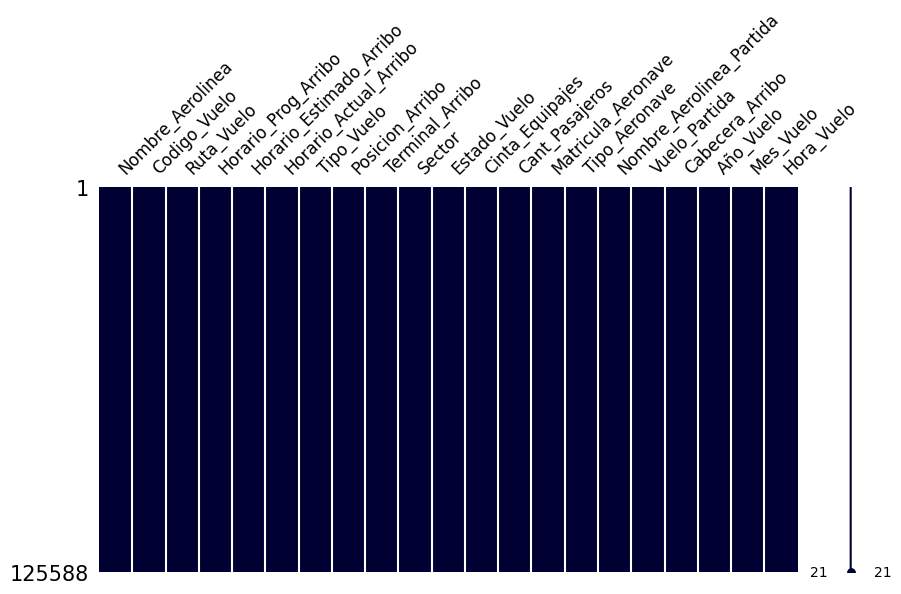

In [ ]:
# Observamos cómo queda la DB
msno.matrix(df,figsize=(10, 5), fontsize=12, color=[0,0,0.2])
plt.show()

##b)Análisis de Nulos “no claros” (undefined? ceros? etc)

In [ ]:
Ruta = np.unique(df['Ruta_Vuelo'])
print(Ruta)

['#¿NOMBRE?' 'ABV' 'AEP' 'AFA' 'ANF' 'ANU' 'APO' 'ARI' 'ASI' 'ASU' 'BAL'
 'BAQ' 'BCN' 'BHI' 'BLL' 'BLV' 'BOG' 'BPS' 'BRC' 'BSB' 'CBB' 'CCS' 'CDG'
 'CGB' 'CGR' 'CIW' 'CJC' 'CLO' 'CMH' 'CNF' 'CNQ' 'COC' 'COR' 'CPC' 'CPT'
 'CRD' 'CSC' 'CSR' 'CTC' 'CUN' 'CUZ' 'CWB' 'CYR' 'CZM' 'DIA' 'DOT' 'EDP'
 'EHL' 'ELO' 'ENO' 'EPA' 'EQS' 'ESC' 'EWR' 'EZE' 'FDO' 'FLL' 'FLN' 'FMA'
 'FOR' 'FTE' 'FXE' 'GEZ' 'GGY' 'GIG' 'GNR' 'GPO' 'GRU' 'GVA' 'GYE' 'GYN'
 'HAV' 'HLI' 'HOU' 'HPN' 'IAD' 'IAH' 'IBZ' 'IGR' 'IGU' 'IPC' 'IQQ' 'IRJ'
 'IST' 'ITO' 'JFK' 'JUJ' 'KNA' 'LAD' 'LAS' 'LCP' 'LGS' 'LHR' 'LIM' 'LPA'
 'LPB' 'LPG' 'LRM' 'LUQ' 'MAD' 'MAO' 'MCO' 'MDE' 'MDQ' 'MDZ' 'MEX' 'MIA'
 'MJR' 'MLG' 'MOR' 'MPN' 'MVD' 'NAS' 'NAT' 'NCJ' 'NEC' 'NIN' 'NQN' 'OAK'
 'OBE' 'OLA' 'OPF' 'OYA' 'OYO' 'PAL' 'PBI' 'PDI' 'PDP' 'PEH' 'PIO' 'PLS'
 'PMC' 'PMI' 'PMQ' 'PMV' 'PMY' 'PNR' 'PNT' 'POA' 'POS' 'PRA' 'PSS' 'PTY'
 'PUD' 'PUJ' 'PUQ' 'QLV' 'RCQ' 'RCU' 'REC' 'REL' 'RES' 'RGA' 'RGL' 'RHD'
 'RLA' 'RLC' 'RLO' 'ROS' 'RSA' 'RYD' 'RZA' 'SAL' 'S

In [ ]:
df['Ruta_Vuelo'].nunique()

215

In [ ]:
def ruta_vuelo_error(df):
  sin_nombre= df[(df['Ruta_Vuelo'] == '#¿NOMBRE?')]
  num_filas = sin_nombre.shape[0]
  print("El DataFrame tiene", num_filas, "filas sin aeropuerto.")

  nombre_XXX= df[(df['Ruta_Vuelo'] == 'XXX')]
  num_filas = nombre_XXX.shape[0]
  print("El DataFrame tiene", num_filas, "filas cuyo aeropuerto es XXX.")
  return

In [ ]:
ruta_vuelo_error(df)

El DataFrame tiene 293 filas sin aeropuerto.
El DataFrame tiene 1 filas cuyo aeropuerto es XXX.


Para estos 294 registros decidimos crear una nueva categoría "Sin aeropuerto" <font color='red'> Imputar con los % de frecuencia.

In [ ]:
frecuencia_columna(df, 'Ruta_Vuelo')

    Ruta_Vuelo  cantidad  porcentaje
0          COR     10271       8.178
1          BRC     10028       7.985
2          MDZ      9230       7.349
3          IGR      7714       6.142
4          SLA      6824       5.434
..         ...       ...         ...
211        SFB         1       0.001
212        TFN         1       0.001
213        CBB         1       0.001
214        ABV         1       0.001
215      Total    125588     100.000

[216 rows x 3 columns]


In [ ]:
df['Ruta_Vuelo'] = df['Ruta_Vuelo'].replace(['#¿NOMBRE?', 'XXX'], 'Desconocido')
ruta_vuelo_error(df)

El DataFrame tiene 0 filas sin aeropuerto.
El DataFrame tiene 0 filas cuyo aeropuerto es XXX.


<ipython-input-164-4366e566239c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ruta_Vuelo'] = df['Ruta_Vuelo'].replace(['#¿NOMBRE?', 'XXX'], 'Desconocido')


Controlamos si hay ceros en alguna otra columna:

In [ ]:
print(df.eq(0).sum())

Nombre_Aerolinea               0
Codigo_Vuelo                   0
Ruta_Vuelo                     0
Horario_Prog_Arribo            0
Horario_Estimado_Arribo        0
Horario_Actual_Arribo          0
Tipo_Vuelo                     0
Posicion_Arribo                0
Terminal_Arribo                0
Sector                         0
Estado_Vuelo                   0
Cinta_Equipajes                0
Cant_Pasajeros              6271
Matricula_Aeronave             0
Tipo_Aeronave                  0
Nombre_Aerolinea_Partida       0
Vuelo_Partida                  0
Cabecera_Arribo                0
Año_Vuelo                      0
Mes_Vuelo                      0
Hora_Vuelo                  4135
dtype: int64


Cant_pasajeros y hora vuelo es lógico que tengan ceros. Ok.

In [ ]:
#for columna in df.columns:
#  print(columna, "\n", df[columna].unique())

In [ ]:
frecuencia_columna(df,"Tipo_Aeronave")

    Tipo_Aeronave  cantidad  porcentaje
0            738W     48236      38.408
1            E190     30886      24.593
2             320     16965      13.508
3            737W      6352       5.058
4             7M8      4128       3.287
..            ...       ...         ...
118           312         1       0.001
119           ER3         1       0.001
120          PA28         1       0.001
121          TBM8         1       0.001
122         Total    125588     100.000

[123 rows x 3 columns]


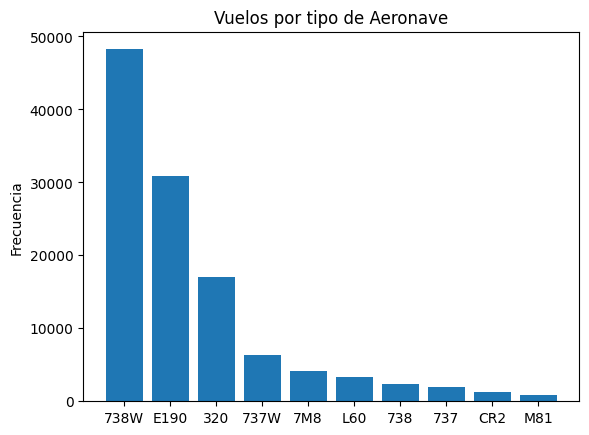

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Calcular frecuencias y ordenar las categorías por frecuencia
frecuencias = Counter(df['Tipo_Aeronave'])
categorias_ordenadas, frecuencias_ordenadas = zip(*frecuencias.most_common(10))

# Graficar el histograma
plt.bar(categorias_ordenadas, frecuencias_ordenadas)

# Etiquetas de frecuencias en el eje y
plt.ylabel('Frecuencia')

# Título del gráfico
plt.title('Vuelos por tipo de Aeronave')

# Mostrar el gráfico
plt.show()

##c)Evaluación de datos de outliers y análisis de los mismos, para decidir qué acción tomar.


No hay outliers de pasajeros

In [ ]:
print("Máximo", max(df['Cant_Pasajeros']))

Máximo 225.0


<font color='red'> Agregar lo de outliers en tiempos

##d)Transformación de fechas, strings a numéricos y/o categórico y otras, en caso de ser necesario.

In [ ]:
# Corrijo tipos de datos que necesito para analizar
df.Horario_Prog_Arribo = pd.to_datetime(df.Horario_Prog_Arribo,dayfirst=True)
df.Horario_Estimado_Arribo = pd.to_datetime(df.Horario_Estimado_Arribo)
df.Horario_Actual_Arribo = pd.to_datetime(df.Horario_Actual_Arribo,dayfirst=True)
df.Cant_Pasajeros = pd.to_numeric(df.Cant_Pasajeros)
#Faltan?

<ipython-input-170-fa323825c6ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Horario_Prog_Arribo = pd.to_datetime(df.Horario_Prog_Arribo,dayfirst=True)
<ipython-input-170-fa323825c6ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Horario_Estimado_Arribo = pd.to_datetime(df.Horario_Estimado_Arribo)
<ipython-input-170-fa323825c6ee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [ ]:
#df[['Fecha_Actual_Arribo','Hora_Actual_Arribo']]=df['Horario_Actual_Arribo'].str.split(' ',expand=True) # ver si conviene separar las variables para trabajar con el formato de fecha corta y hora?

In [ ]:
df.dtypes # Verifico los cambios realizados

Nombre_Aerolinea                    object
Codigo_Vuelo                        object
Ruta_Vuelo                          object
Horario_Prog_Arribo         datetime64[ns]
Horario_Estimado_Arribo     datetime64[ns]
Horario_Actual_Arribo       datetime64[ns]
Tipo_Vuelo                          object
Posicion_Arribo                     object
Terminal_Arribo                     object
Sector                              object
Estado_Vuelo                        object
Cinta_Equipajes                     object
Cant_Pasajeros                     float64
Matricula_Aeronave                  object
Tipo_Aeronave                       object
Nombre_Aerolinea_Partida            object
Vuelo_Partida                       object
Cabecera_Arribo                    float64
Año_Vuelo                            int64
Mes_Vuelo                            int64
Hora_Vuelo                           int64
dtype: object

##e)Limpieza de datos duplicados

Eliminamos duplicados (no hay)

In [ ]:
df=df.drop_duplicates() # Borro duplicados
print(df.shape) # Verifico líneas al final para saber si hubo cambios

(125588, 21)


##f)Eliminación de datos innecesarios

Por ahora no detectamos datos innecesarios.

##Adicional: unir las bases de datos de aeropuertos y aeronaves a nuestra base:

In [ ]:
df = pd.merge(df, Aeropuertos_df, left_on='Ruta_Vuelo', right_on='Código_aeropuerto')
df = pd.merge(df, Aeronaves_df, left_on='Tipo_Aeronave', right_on='Tipo de Aeronave')
df[:3]

,Nombre_Aerolinea,Codigo_Vuelo,Ruta_Vuelo,Horario_Prog_Arribo,Horario_Estimado_Arribo,Horario_Actual_Arribo,Tipo_Vuelo,Posicion_Arribo,Terminal_Arribo,Sector,Estado_Vuelo,Cinta_Equipajes,Cant_Pasajeros,Matricula_Aeronave,Tipo_Aeronave,Nombre_Aerolinea_Partida,Vuelo_Partida,Cabecera_Arribo,Año_Vuelo,Mes_Vuelo,Hora_Vuelo,Código_aeropuerto,Nombre_aeropuerto,Pais,Ciudad,Tipo de Aeronave,Capacidad máxima de pasajeros,Uso más común
0,DN,6049,IGR,2019-01-01 01:50:00,2019-01-01 01:22:00,2019-01-01 01:22:00,1 C P,31,A,2,ATE,8,100.000,LVHQH,738,DN,6062,31.000,2019,1,1,IGR,Cataratas del Iguazú International Airport,Argentina,Puerto Iguazú,738,189,Transporte de pasajeros
1,DN,6049,IGR,2019-01-02 01:50:00,2019-02-01 02:06:00,2019-01-02 02:06:00,1 C P,30,A,2,ATE,7,148.000,LVHQH,738,DN,6022,31.000,2019,1,1,IGR,Cataratas del Iguazú International Airport,Argentina,Puerto Iguazú,738,189,Transporte de pasajeros
2,DN,6049,IGR,2019-01-09 01:50:00,2019-09-01 02:54:00,2019-01-09 02:54:00,1 C P,29,A,2,ATE,6,128.000,LVHQH,738,DN,6062,13.000,2019,1,1,IGR,Cataratas del Iguazú International Airport,Argentina,Puerto Iguazú,738,189,Transporte de pasajeros


In [ ]:
df = df.drop('Código_aeropuerto', axis=1)
df = df.drop('Tipo de Aeronave', axis=1)
df.rename(columns={'Pais': 'Pais_Aeropuerto', # '4M' '5U' 'A0' 'AJ' 'AR' 'AU' 'DN' 'FAA' 'FO' 'FQ' 'G3' 'H2' 'H8' 'JA', 'LA' 'LP' 'OY' 'PRV' 'USF' 'VH' 'WJ' 'Z7' 'ZP'
           'Ciudad': 'Ciudad_Aeropuerto',
           'Capacidad máxima de pasajeros': 'Capacidad_Max_Aeronave',
           'Uso más común': 'Uso_Aeronave'},
           inplace = True)
df[:3]

,Nombre_Aerolinea,Codigo_Vuelo,Ruta_Vuelo,Horario_Prog_Arribo,Horario_Estimado_Arribo,Horario_Actual_Arribo,Tipo_Vuelo,Posicion_Arribo,Terminal_Arribo,Sector,Estado_Vuelo,Cinta_Equipajes,Cant_Pasajeros,Matricula_Aeronave,Tipo_Aeronave,Nombre_Aerolinea_Partida,Vuelo_Partida,Cabecera_Arribo,Año_Vuelo,Mes_Vuelo,Hora_Vuelo,Nombre_aeropuerto,Pais_Aeropuerto,Ciudad_Aeropuerto,Capacidad_Max_Aeronave,Uso_Aeronave
0,DN,6049,IGR,2019-01-01 01:50:00,2019-01-01 01:22:00,2019-01-01 01:22:00,1 C P,31,A,2,ATE,8,100.000,LVHQH,738,DN,6062,31.000,2019,1,1,Cataratas del Iguazú International Airport,Argentina,Puerto Iguazú,189,Transporte de pasajeros
1,DN,6049,IGR,2019-01-02 01:50:00,2019-02-01 02:06:00,2019-01-02 02:06:00,1 C P,30,A,2,ATE,7,148.000,LVHQH,738,DN,6022,31.000,2019,1,1,Cataratas del Iguazú International Airport,Argentina,Puerto Iguazú,189,Transporte de pasajeros
2,DN,6049,IGR,2019-01-09 01:50:00,2019-09-01 02:54:00,2019-01-09 02:54:00,1 C P,29,A,2,ATE,6,128.000,LVHQH,738,DN,6062,13.000,2019,1,1,Cataratas del Iguazú International Airport,Argentina,Puerto Iguazú,189,Transporte de pasajeros


In [ ]:
#Control de que todas las columnas agregadas tengan datos:
porcentaje_nulos(df)

Series([], dtype: float64)


#4. Preguntas relevantes del negocio

##a)¿Cómo varía el volumen total de arribos según el mes? ¿y por día de la semana?

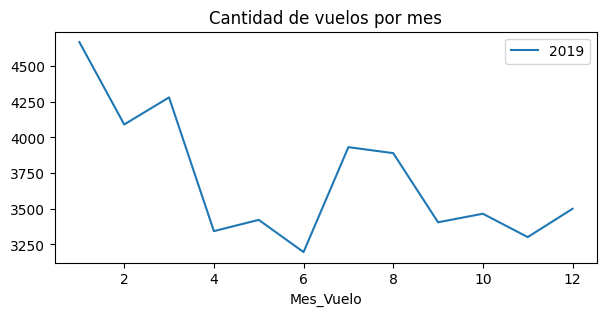

In [ ]:
#@title Vuelos por Mes en el año 2019
df[df['Año_Vuelo'] == 2019].groupby(df['Mes_Vuelo']).Nombre_Aerolinea.count().plot(kind='line', figsize=(7, 3))

plt.title('Cantidad de vuelos por mes')
plt.legend(['2019'])
plt.show()

In [ ]:
#Creación de nueva columna que contenga el dia que se realizo cada vuelo
dia=[]
for i in df.index:
    d = df['Horario_Prog_Arribo'][i].weekday()   #La funcion weekday() devuelve un nuumero del 0 al 6, donde 0 es Lunes y el 6 Domingo
    dia.append(d)
df['Dia_Semana']=dia

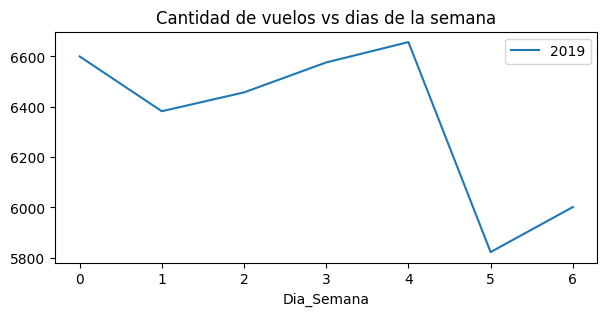

In [ ]:
#@title Dia de la semana con mas vuelos en el año 2019
df[df['Año_Vuelo'] == 2019].groupby(df['Dia_Semana']).Nombre_Aerolinea.count().plot(kind='line', figsize=(7, 3))

plt.title('Cantidad de vuelos vs dias de la semana')
plt.legend(['2019'])
plt.show()

##Si analizamos el año 2019, vemos que en ENERO tenemos la mayor concurrencia de vuelos y respecto a que dia es el que mayor volumen de vuelos presenta podemos decir que son los LUNES Y VIERNES.

##b)¿Cómo varía el volumen de pasajeros por mes?

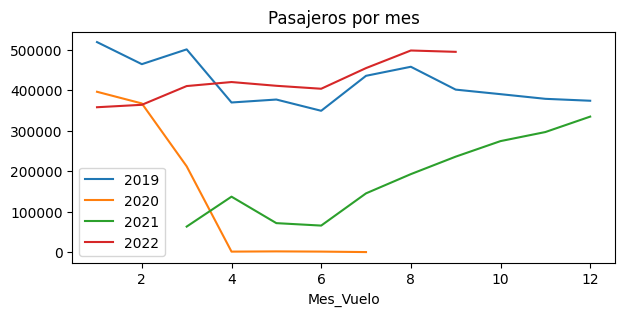

In [ ]:
df[df['Año_Vuelo'] == 2019].groupby(df['Mes_Vuelo']).Cant_Pasajeros.sum().plot(kind='line', figsize=(7, 3))
df[df['Año_Vuelo'] == 2020].groupby(df['Mes_Vuelo']).Cant_Pasajeros.sum().plot(kind='line', figsize=(7, 3))
df[df['Año_Vuelo'] == 2021].groupby(df['Mes_Vuelo']).Cant_Pasajeros.sum().plot(kind='line', figsize=(7, 3))
df[df['Año_Vuelo'] == 2022].groupby(df['Mes_Vuelo']).Cant_Pasajeros.sum().plot(kind='line', figsize=(7, 3))

plt.title('Pasajeros por mes')
plt.legend(['2019', '2020', '2021', '2022'])
plt.show()

##c)¿Existe alguna tendencia ó fluctuación cíclica en función de la estacionalidad? ¿Hay días especiales en el año?


In [ ]:
#Creacion de una nueva columna que solo contenga la el dia mes y año parar poder analizar cada dia
import datetime

Dma= []
for i in df.index:
    d =  datetime.date(df['Horario_Prog_Arribo'][i].year,df['Horario_Prog_Arribo'][i].month, df['Horario_Prog_Arribo'][i].day)
    Dma.append(d)

df['D_M_A'] = Dma

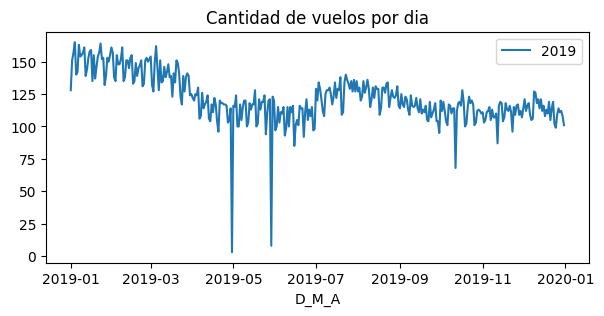

In [ ]:
df[df['Año_Vuelo'] == 2019].groupby(df['D_M_A']).Nombre_Aerolinea.count().plot(kind='line', figsize=(7, 3))

plt.title('Cantidad de vuelos por dia')
plt.legend(['2019'])
plt.show()

In [ ]:
#@title Dia con mayor numero de vuelos
df[df['Año_Vuelo'] == 2019].groupby(df['D_M_A']).Nombre_Aerolinea.count().idxmax() , df[df['Año_Vuelo'] == 2019].groupby(df['D_M_A']).Nombre_Aerolinea.count().max()

(datetime.date(2019, 1, 4), 165)

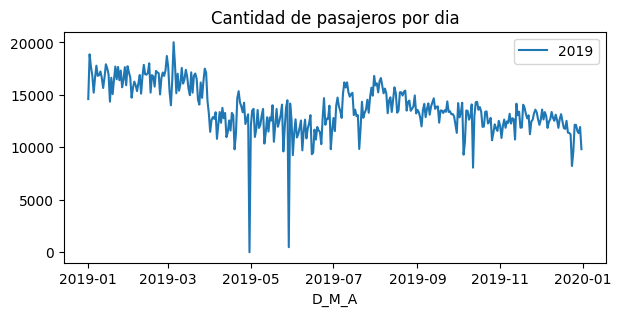

In [ ]:
df[df['Año_Vuelo'] == 2019].groupby(df['D_M_A']).Cant_Pasajeros.sum().plot(kind='line', figsize=(7, 3))

plt.title('Cantidad de pasajeros por dia')
plt.legend(['2019'])
plt.show()

In [ ]:
#@title Dia con mayor numero de pasajeros
df[df['Año_Vuelo'] == 2019].groupby(df['D_M_A']).Cant_Pasajeros.sum().idxmax() , df[df['Año_Vuelo'] == 2019].groupby(df['D_M_A']).Cant_Pasajeros.sum().max()

(datetime.date(2019, 3, 5), 20025.0)

##d)¿Cual es la distribución de vuelos provenientes de los distintos orígenes?

##e) y otras similares.

#5 Nuevas columnas

##a)Construcción de columnas de información valiosa. Por ejemplo, crear una columna donde solo este el mes, para hacer un conteo de vuelos por meses, etc.


##b)Idealmente, construir columna target suponiendo predicción de retraso. Para esto, se debería calcular la diferencia entre horario programado de arribo y horario real de arribo…

##c)En caso de construir dicha columna, evaluar el balance (proporción de 1 vs proporción de 0) de la misma, y la distribución de las otras variables contra el target.

##d)Selección de variables relevantes para predecir los retrasos


In [ ]:
#@title Vuelos por año
#transformo el type de las columnas STA y ATA a fecha y hora:
df['Horario_Prog_Arribo'] = pd.to_datetime(df['Horario_Prog_Arribo'], format='%d/%m/%Y %H:%M') #Pasar arriba al punto 2.d :)
df['Horario_Actual_Arribo'] = pd.to_datetime(df['Horario_Actual_Arribo'], format='%d/%m/%Y %H:%M')

#cuántos vuelos hubo en cada año? ORDENADOS POR AÑO
print('CANTIDAD DE VUELOS POR AÑO')
df['Horario_Prog_Arribo'].dt.year.value_counts().sort_index() #usando la variable año el resultado es el mismo (datos consistentes)

CANTIDAD DE VUELOS POR AÑO


2019    44495
2020     9143
2021    16859
2022    30591
Name: Horario_Prog_Arribo, dtype: int64

In [ ]:
df.columns.values

array(['Nombre_Aerolinea', 'Codigo_Vuelo', 'Ruta_Vuelo',
       'Horario_Prog_Arribo', 'Horario_Estimado_Arribo',
       'Horario_Actual_Arribo', 'Tipo_Vuelo', 'Posicion_Arribo',
       'Terminal_Arribo', 'Sector', 'Estado_Vuelo', 'Cinta_Equipajes',
       'Cant_Pasajeros', 'Matricula_Aeronave', 'Tipo_Aeronave',
       'Nombre_Aerolinea_Partida', 'Vuelo_Partida', 'Cabecera_Arribo',
       'Año_Vuelo', 'Mes_Vuelo', 'Hora_Vuelo', 'Nombre_aeropuerto',
       'Pais_Aeropuerto', 'Ciudad_Aeropuerto', 'Capacidad_Max_Aeronave',
       'Uso_Aeronave', 'Dia_Semana', 'D_M_A'], dtype=object)

In [ ]:
df[df['Año_Vuelo'] == 2019].groupby('Mes_Vuelo').size().reset_index(name='count')


,Mes_Vuelo,count
0,1,4669
1,2,4091
2,3,4281
3,4,3343
4,5,3422
5,6,3196
6,7,3932
7,8,3890
8,9,3405
9,10,3465


    Mes_Vuelo  count
0           1   4669
1           2   4091
2           3   4281
3           4   3343
4           5   3422
5           6   3196
6           7   3932
7           8   3890
8           9   3405
9          10   3465
10         11   3301
11         12   3500


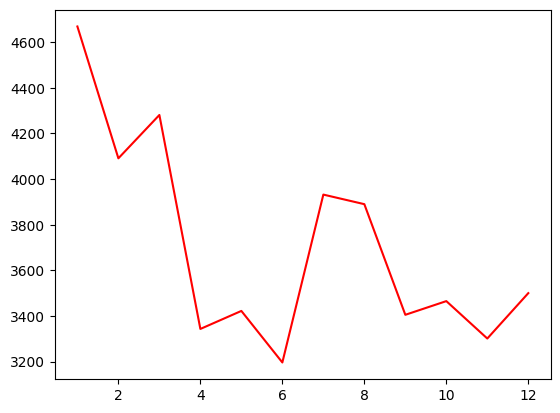

In [ ]:
a = df[df['Año_Vuelo'] == 2019].groupby('Mes_Vuelo').size().reset_index(name='count')
print(a)
plt.plot(a["Mes_Vuelo"], a["count"], color = 'r', label = "2019")

In [ ]:
print(df[:10])
print(df["Estado_Vuelo"].unique())

  Nombre_Aerolinea Codigo_Vuelo Ruta_Vuelo Horario_Prog_Arribo  \
0               DN         6049        IGR 2019-01-01 01:50:00   
1               DN         6049        IGR 2019-01-02 01:50:00   
2               DN         6049        IGR 2019-01-09 01:50:00   
3               DN         6049        IGR 2019-01-10 01:50:00   
4               DN         6049        IGR 2019-01-11 01:50:00   
5               DN         6049        IGR 2019-01-12 01:50:00   
6               DN         6049        IGR 2019-01-13 01:50:00   
7               DN         6049        IGR 2019-01-16 01:50:00   
8               DN         6049        IGR 2019-01-21 01:50:00   
9               DN         6049        IGR 2019-01-22 01:50:00   

  Horario_Estimado_Arribo Horario_Actual_Arribo Tipo_Vuelo Posicion_Arribo  \
0     2019-01-01 01:22:00   2019-01-01 01:22:00      1 C P              31   
1     2019-02-01 02:06:00   2019-01-02 02:06:00      1 C P              30   
2     2019-09-01 02:54:00   2019-01-09 

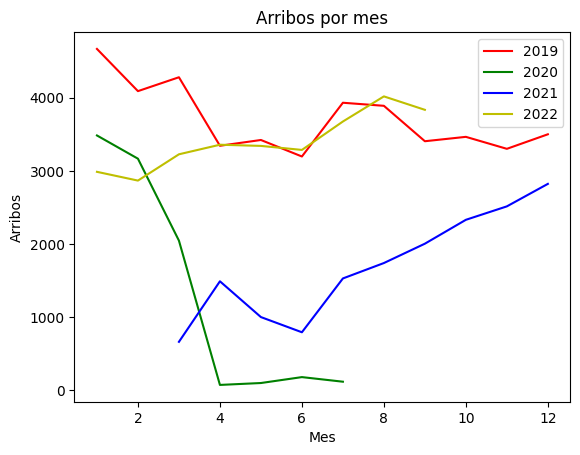

In [ ]:
count_2019 = df[df['Año_Vuelo'] == 2019].groupby('Mes_Vuelo').size().reset_index(name='count')
count_2020 = df[df['Año_Vuelo'] == 2020].groupby('Mes_Vuelo').size().reset_index(name='count')
count_2021 = df[df['Año_Vuelo'] == 2021].groupby('Mes_Vuelo').size().reset_index(name='count')
count_2022 = df[df['Año_Vuelo'] == 2022].groupby('Mes_Vuelo').size().reset_index(name='count')

plt.plot(count_2019["Mes_Vuelo"], count_2019["count"], color='r', label='2019')
plt.plot(count_2020["Mes_Vuelo"], count_2020["count"], color='g', label='2020')
plt.plot(count_2021["Mes_Vuelo"], count_2021["count"], color='b', label='2021')
plt.plot(count_2022["Mes_Vuelo"], count_2022["count"], color='y', label='2022')

plt.legend()
plt.xlabel('Mes')
plt.ylabel('Arribos')
plt.title('Arribos por mes')
plt.show()

In [ ]:
df[df['año'] == 2019].groupby(df['mes']).Aero.count().plot(kind='line', figsize=(7, 3))
df[df['año'] == 2022].groupby(df['mes']).Aero.count().plot(kind='line', figsize=(7, 3))
df[df['año'] == 2021].groupby(df['mes']).Aero.count().plot(kind='line', figsize=(7, 3))
df[df['año'] == 2020].groupby(df['mes']).Aero.count().plot(kind='line', figsize=(7, 3))

plt.xlabel('Mes')
plt.ylabel('Arribos')
plt.title('Arribos por mes')
plt.legend(['2019','2022','2021', '2020'])
plt.show()

KeyError: ignored

In [ ]:
df[df['año'] == 2019].groupby(df['mes']).Aero.count().plot(kind='line', figsize=(7, 3))
df[df['año'] == 2022].groupby(df['mes']).Aero.count().plot(kind='line', figsize=(7, 3))

plt.xlabel('Mes')
plt.ylabel('Arribos')
plt.title('Arribos por mes')
plt.legend(['2019', '2022'])
plt.show()

KeyError: ignored

In [ ]:
#df[df['año'] == 2019].groupby(df['mes']).Pax.sum().plot(kind='line', figsize=(7, 3))
#df[df['año'] == 2022].groupby(df['mes']).Pax.sum().plot(kind='line', figsize=(7, 3))

#plt.xlabel('Mes')
#plt.ylabel('Pax')
#plt.title('Pasajeros por mes')
#plt.legend(['2019', '2022'])
#plt.show()

KeyError: ignored

Tenemos un solo año _"NORMAL"_ con datos completos: 2019.

2020 y 2021 pandemia.

Estimar los arribos aprox del último tercio de 2022.

Aproximación:

In [ ]:
#cuántos vuelos hubo entre octubre y diciembre de 2019?
"""
print('CANTIDAD DE VUELOS ENTRE OCTUBRE Y DICIEMBRE DE 2019')
df[(df['STA'].dt.year == 2019) & (df['STA'].dt.month >= 10)].shape[0]
"""

"\nprint('CANTIDAD DE VUELOS ENTRE OCTUBRE Y DICIEMBRE DE 2019')\ndf[(df['STA'].dt.year == 2019) & (df['STA'].dt.month >= 10)].shape[0]\n"

Esto es, un 23,28% de los vuelos de 2019. Si utilizamos este porcentaje (considerando la estacionalidad) para estimar los vuelos totales de 2022:

(solamente a los fines exploratorios)

In [ ]:
#vuelos totales estimados de 2022
#print('VUELOS TOTALES ESTIMADOS DE 2022:')
#37777/(1- 13315/57181)

VUELOS TOTALES ESTIMADOS DE 2022:


49243.75682761136

Con esta estimación(*), tenemos estos nuevos valores de vuelos totales:

2019:   57.181 vuelos

2020:    11.441 vuelos

2021:    21.530 vuelos

2022(*):    49.244 vuelos


_Los vuelos de 2022 *serían* un 86% del total de 2019._

//

_de nuevo: solo a fines exploratorios._

In [ ]:
#@title Aerolíneas más frecuentes (con más vuelos)
#print('AEROLÍNEAS CON MÁS VUELOS:')
#
#frecuencias_absolutas = df['Aero'].value_counts().reset_index().rename(columns={'index': 'Aero', 'Aero': 'Frecuencia Absoluta'})
#frecuencias_relativas = df['Aero'].value_counts(normalize=True).reset_index().rename(columns={'index': 'Aero', 'Aero': 'Frecuencia Relativa'})
#tabla_frecuencias = frecuencias_absolutas.merge(frecuencias_relativas, on='Aero')
#print(tabla_frecuencias.head(23))


AEROLÍNEAS CON MÁS VUELOS:


KeyError: ignored

Último vuelo en Aeroparque de Austral (se fusionó con Aerolíneas Argentinas):

In [ ]:
#Aero AU STA max
#print('AERO AU STA MAX:')
#df[df['Aero'] == 'AU'].STA.max()

In [ ]:
#filtramos el Aero DN
#df_dn = df[df['Aero'] == 'DN']
#df_dn.shape
#
##describe de año
#df_dn['ATA'].describe()


In [ ]:
#filtramos Aero FAA
#df_fa = df[df['Aero'] == 'FAA']
#df_fa.Mat.unique()


51% Aerolíneas Argentinas

15% Austral (antes de fusionarse con Aerolíneas Argentinas)

8% LATAM

8% Aero Chaco

5% JetSMART

4% Flybondi

4% Norwegian Air (YA NO OPERA. 19/3/2020 último vuelo)



#### **Matrículas argentinas vs extranjeras**

PREFIJOS DE MATRÍCULAS ARGENTINAS:

**LV y LQ**

Otras matrículas argentinas (Fuerza Aérea, Prefectura Naval, Flota presidencial):

PA73, T04, T10, T11,T22,T25,T26,T32,T33,T34, T99, TC52, TC53, TC61, TC66, TC70, TC99, TC115, TC117



**PREFIJOS DE MATRÍCULAS DE OTROS PAÍSES**

PR: BRASIL

CC: CHILE

CX: URUGUAY

ZP: PARAGUAY




In [ ]:
#mat_arg = [
#    'PA73','T04', 'T10', 'T11', 'T22', 'T25', 'T26', 'T32', 'T33', 'T34',
#     'T99','TC52', 'TC53', 'TC61', 'TC66', 'TC70', 'TC99', 'TC115', 'TC117'
#     ]
#
#df['Mat'] = df['Mat'].astype(str)
# Filtrar las matrículas que no empiezan con 'LV' o 'LQ' y no están en la lista anterior
#mat_foreing = df[~df['Mat'].str.startswith(('LV', 'LQ')) & ~df['Mat'].isin(mat_arg)]['Mat']

#hay matrículas NA en mat_foreing?
#print('MATRÍCULAS NA EN MAT_FOREING:')
#display(mat_foreing.isna().sum())

#cantidad de filas con matrículas extranjeras
#print('CANTIDAD DE FILAS CON MATRÍCULAS EXTRANJERAS:')
#display(mat_foreing.shape[0])

#print(f'(de un total de {df.shape[0]} filas)')

In [ ]:
#describe = df.describe(include='all')

#creación de una nueva columna. Primeros 2 caracteres de la columna Mat:
#df['Mat'] = df['Mat'].astype(str)
#df['Pref_Mat'] = df['Mat'].str[:2]
#
#print('FRECUENCIAS ABSOLUTAS')
#display(df.Pref_Mat.value_counts().head(7))
#print('FRECUENCIAS RELATIVAS')
#display(df.Pref_Mat.value_counts(normalize=True).head(7))

AEROPUERTOS

In [ ]:
#display(df.Aero.describe())
#print(f'Porcentaje de AR: {65423/127929}')

In [ ]:
# Matrículas que comienzan con 'T' pero no son argentinas?
#filtered_df = df[df['Mat'].str.startswith('T') & ~df['Mat'].isin(['T04', 'T10', 'T11','T22','T25','T26','T32','T33','T34', 'T99', 'TC52', 'TC53', 'TC61', 'TC66', 'TC70', 'TC99', 'TC115', 'TC117'])]
#
#display(filtered_df.head())


ORIGEN

In [ ]:
#COUNTS OF ORIGEN. tabla de frecuencias absolutas y relativas
#print('FRECUENCIAS ABSOLUTAS')
#display(df.Origen.value_counts().head(8))
#print('FRECUENCIAS RELATIVAS')
#display(df.Origen.value_counts(normalize=True).head(8))

In [ ]:
#Creación de una nueva columna que sea la diferencia entre ATA y STA (Retraso)
#delay = []
#for row in df.itertuples():
#    diff = row.ATA - row.STA
#    diff_minutes = diff.total_seconds() / 60
#    delay.append(diff_minutes)
#df['Retraso 1'] = delay
#df.head()

NUESTRO DATASET ESTÁ USANDO LOS CÓDIGOS **IATA** EN LA COLUMNA **Origen**

HAY QUE TRABAJAR EL **ETA** PARA AGREGARLE EL DÍA (solucionando problema al rededor de las 00:00 hs)

ANALICEMOS EL RETRASO POR DIFERENCIA CON EL STA:

In [ ]:
#describe Retraso 1
#df['Retraso 1'].describe()

La mediana es de **8 minutos de adelanto**

El 50% central de los datos se ubica entre 17 min de adelanto y 0 retraso.

¿Cuántas observaciones se demoran más de media hora?

In [ ]:
#count retraso mayor o igual a 30 min:
#df[df['Retraso 1'] >= 30]['Retraso 1'].count()

In [ ]:
#dejemos de lado los años 2020 y 2021
#df_2019 = df[df['STA'].dt.year == 2019]
#df_2022 = df[df['STA'].dt.year == 2022]
#
##df_sin_pandemia= df_sin_pandemia[df_sin_pandemia['STA'].dt.year != 2021]
#
##count retraso mayor o igual a 30 min:
#df_2019[df_2019['Retraso 1'] >= 30]['Retraso 1'].count()
#print(f'Cantidad de vuelos con retraso desde 30 min en 2019: {df_2019[df_2019["Retraso 1"] >= 30]["Retraso 1"].count()} de {df_2019.shape[0]})')
#print(f'Esto significa un porcentaje de {df_2019[df_2019["Retraso 1"] >= 30]["Retraso 1"].count()/df_2019.shape[0]}')
#
#df_2022[df_2022['Retraso 1'] >= 30]['Retraso 1'].count()
#print(f'Cantidad de vuelos con retraso desde 30 min en 2022: {df_2022[df_2022["Retraso 1"] >= 30]["Retraso 1"].count()} de {df_2022.shape[0]})')
#print(f'esto es un porcentaje de {df_2022[df_2022["Retraso 1"] >= 30]["Retraso 1"].count()/df_2022.shape[0]}')

In [ ]:
#nuevo dataframe: 2019 y 2022 con retrasos mayores a 30 min
#df_2019_2022 = pd.concat([df_2019, df_2022])
#df_2019_2022.head()
#
##Aerolíneas con más vuelos
#print('AEROLÍNEAS CON MÁS VUELOS:')
#frecuencias_absolutas = df_2019_2022['Aero'].value_counts().reset_index().rename(columns={'index': 'Aero', 'Aero': 'Frecuencia Absoluta'})
#frecuencias_relativas = df_2019_2022['Aero'].value_counts(normalize=True).reset_index().rename(columns={'index': 'Aero', 'Aero': 'Frecuencia Relativa'})
#tabla_frecuencias = frecuencias_absolutas.merge(frecuencias_relativas, on='Aero')
#print(tabla_frecuencias.head(21))
#
##dataframe con retrasos mayores a 30 min
#df_retrasos = df_2019_2022[df_2019_2022['Retraso 1'] >= 30]
#df_retrasos.head()
#
#display(df_retrasos.shape)

IMPORTO EL SET DE DATOS DE LOS CÓDIGOS DE AEROPUERTOS DE ARGENTINA

In [ ]:
#Aeródromos ANAC
#IMPORT CSV
#ANAC_aeros = pd.read_csv('Aeródromos_ANAC.csv', sep=',')
#ANAC_aeros.head()

In [ ]:
#VISUALIZAR ORIGEN= NCJ
#df[df['Origen'] == 'NCJ'].head()

NCJ es un aeropuerto en Sunchales, Santa Fe.

In [ ]:
#me quedo con las siguientes columnas:
#ANAC_aeros = ANAC_aeros[['iata', 'oaci', 'latitud', 'longitud', 'provincia', 'elev_m', 'denominacion','inhab']]
##agrego una columna de país (el set de ANAC son todos Arg)
#ANAC_aeros['Nac'] = 'ARGENTINA'

#merge
#df = df.merge(ANAC_aeros, left_on='Origen', right_on='iata', how='left')
#
#df.head()

**Aero vs Aero 1**

In [ ]:
#filtrar las filas en donde Aero es distinto a Aero1
#df_diferencias = df[df['Aero'] != df['Aero.1']]
#display(df_diferencias.shape)
##eliminar filas donde Aero1 es na
#df_diferencias2 = df_diferencias[df_diferencias['Aero.1'].notna()]
#display(df_diferencias2.shape)

**¿INTERNACIONALES?**

In [ ]:
#ver los NA en iata:
#df_sinubicar = df[df['iata'].isna()].copy()
#
##describe de Origen
#df_sinubicar.Origen.describe()

In [ ]:
#frecuencias de Origen
df_sinubicar.Origen.value_counts().head(15)

In [ ]:
#Diccionario de PAÍS (Nac) para completar según Origen:
#diccionario = {'GRU': 'BRASIL','MVD': 'URUGUAY', 'PDP':'URUGUAY', 'SCL':'CHILE',
#               'GIG':'BRASIL','ASU':'PARAGUAY','LIM':'PERÚ','FLN':'BRASIL','VVI':'BOLIVIA',
#               'SCA':'COLOMBIA','POA':'BRASIL','BSB':'BRASIL','CWB':'BRASIL','SSA':'BRASIL',
#               'BOG':'COLOMBIA','NCJ':'ARGENTINA','GYE':'ECUADOR','PAL':'COLOMBIA','MOR':'ARGENTINA'}
#
##COMPLETAR Nac
#df['Nac'] = df['Nac'].fillna(df['Origen'].map(diccionario))

Aeródromos pendientes de ubicar y sus frecuencias:

In [ ]:
#df_where = df[df['Nac'].isna()].copy()
##count origen
#df_where.Origen.value_counts().head(15)

In [ ]:
#VER FILAS DONDE Nac es SRC, #¿NOMBRE? o FOR:
#display(df[df['Origen'] == 'SRC'].head())
#display(df[df['Origen'] == '#¿NOMBRE?'].head())
#display(df[df['Origen'] == 'FOR'].head())



In [ ]:
#ver frecuencias por Nac.  group by year
#display(df.groupby(df['año']).Nac.value_counts().head(23))
#
##df.Nac.value_counts().head(15)
#
##ver año == 2022 frecuencias por Nac (lo separo por una cuestión de visualización)
#print('2022')
#df[df['año'] == 2022].Nac.value_counts().head(15)


In [ ]:
#df.shape

In [ ]:
#df describe columna tipo
#df['Tipo'].describe()

In [ ]:
#Describe las 3 columnas: Pos, Ter, Sec
#df[['Pos', 'Ter', 'Sec']].describe()


In [ ]:
#count most frequent Acft
#df.Acft.value_counts().head()


Boeing 738 - Capacidad max 189 pax

Embraer 190: Capacidad max 100 pax

Airbus 320: Capacidad max 220 pax

Boeing 737 - Capacidad max 168 pax

In [ ]:
#frecuencia por cabecera
#df.Cabecera.value_counts().head()

74%. Predominan los arribos por cabecera 13 (¿predomina viento noroeste?)

In [ ]:
#cabecera en el tiempo - gráfico por mes
#df.groupby(df['mes']).Cabecera.value_counts().plot(kind='bar', figsize=(7, 3))

Todos los meses se usa más la cabecera 13. No es una cuestión estacional.

In [ ]:
#pasajeros a lo largo de tod 2019
#etiquetas_meses = ['ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN',
#                   'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DIC']
#df[df['año'] == 2019].groupby(df['mes']).Pax.sum().plot(kind='bar', figsize=(7, 3)), plt.title('Pasajeros mensuales - 2019'),plt.xticks(range(12), etiquetas_meses, rotation=90)
#
#plt.show()

In [ ]:
#pasajeros a lo largo de todo el 2022
#etiquetas_meses = ['ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN',
#                   'JUL', 'AGO', 'SEP']
#df[df['año'] == 2022].groupby(df['mes']).Pax.sum().plot(kind='bar', figsize=(7, 3), color='orange'), plt.title('Pasajeros mensuales 2022'),plt.xticks(range(9), etiquetas_meses, rotation=90)
#plt.show()

In [ ]:
#filas con pax menor a 10
#df[df['Pax'] < 10].shape

In [ ]:
# guardamos en el drive el DB
with open(path, 'w') as f:
  df.to_csv(f, index=False)